In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Browse the data

In [2]:
cars = pd.read_csv("data.csv")
cars.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

## Drop rows that are not necessary

In [4]:
cars = cars.drop(['Market Category','Driven_Wheels'], axis=1)

## Rename the variables

In [5]:
cars.rename(columns = {"Engine Fuel Type": "Fuel", "Engine HP":"HP", "Engine Cylinders": "Cylinders",
                       "highway MPG": "MPG_H", "city mpg": "MPG_C", "MSRP": "Price","Number of Doors": "Doors", 
                       "Vehicle Size": "Size","Vehicle Style": "Style","Transmission Type": "Gear"},inplace=True)
cars.head()

,Make,Model,Year,Fuel,HP,Cylinders,Gear,Doors,Size,Style,MPG_H,MPG_C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,2.0,Compact,Convertible,28,18,3916,34500


## Drop duplicates

In [6]:
cars = cars.drop_duplicates()
cars.shape

(11169, 14)

## Deal with missing values

In [7]:
print(cars.isnull().sum())

Make           0
Model          0
Year           0
Fuel           3
HP            69
Cylinders     30
Gear           0
Doors          6
Size           0
Style          0
MPG_H          0
MPG_C          0
Popularity     0
Price          0
dtype: int64


In [8]:
cars = cars.dropna() 
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11067 entries, 0 to 11913
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Make        11067 non-null  object 
 1   Model       11067 non-null  object 
 2   Year        11067 non-null  int64  
 3   Fuel        11067 non-null  object 
 4   HP          11067 non-null  float64
 5   Cylinders   11067 non-null  float64
 6   Gear        11067 non-null  object 
 7   Doors       11067 non-null  float64
 8   Size        11067 non-null  object 
 9   Style       11067 non-null  object 
 10  MPG_H       11067 non-null  int64  
 11  MPG_C       11067 non-null  int64  
 12  Popularity  11067 non-null  int64  
 13  Price       11067 non-null  int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 1.3+ MB


## Outliers

<AxesSubplot:xlabel='Price'>

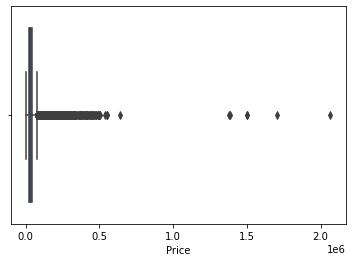

In [9]:
sns.boxplot(x=cars.Price)

<AxesSubplot:xlabel='MPG_C'>

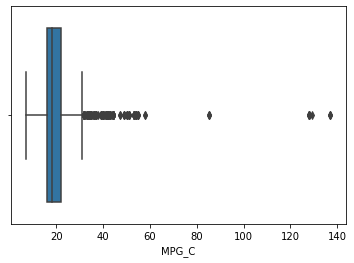

In [10]:
sns.boxplot(x=cars.MPG_C)

<AxesSubplot:xlabel='MPG_H'>

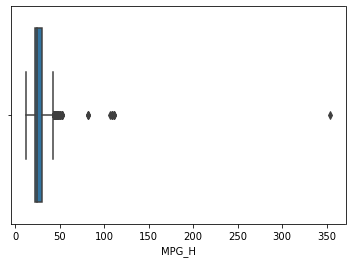

In [11]:
sns.boxplot(x=cars.MPG_H)

<AxesSubplot:xlabel='HP'>

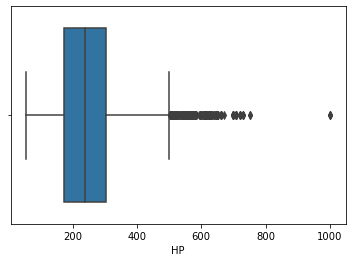

In [12]:
sns.boxplot(x=cars.HP)

In [13]:
Q1 = cars.quantile(0.25)
Q3 = cars.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year              9.0
HP              132.0
Cylinders         2.0
Doors             2.0
MPG_H             8.0
MPG_C             6.0
Popularity     1460.0
Price         21505.0
dtype: float64


In [14]:
cars = cars[~((cars < (Q1 - 1.5 * IQR)) |(cars > (Q3 + 1.5 * IQR))).any(axis=1)]
cars.shape

(8595, 14)

In [15]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8595 entries, 0 to 11913
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Make        8595 non-null   object 
 1   Model       8595 non-null   object 
 2   Year        8595 non-null   int64  
 3   Fuel        8595 non-null   object 
 4   HP          8595 non-null   float64
 5   Cylinders   8595 non-null   float64
 6   Gear        8595 non-null   object 
 7   Doors       8595 non-null   float64
 8   Size        8595 non-null   object 
 9   Style       8595 non-null   object 
 10  MPG_H       8595 non-null   int64  
 11  MPG_C       8595 non-null   int64  
 12  Popularity  8595 non-null   int64  
 13  Price       8595 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 1007.2+ KB


## Change the data type

In [16]:
cars = cars.astype({'Make':'category', 'Model':'string', 'Fuel':'category',
                    'Gear':'category','Size':'category','Style':'category'})
cars.dtypes

Make          category
Model           string
Year             int64
Fuel          category
HP             float64
Cylinders      float64
Gear          category
Doors          float64
Size          category
Style         category
MPG_H            int64
MPG_C            int64
Popularity       int64
Price            int64
dtype: object

## Visualisations

Text(0.5, 0, 'Make')

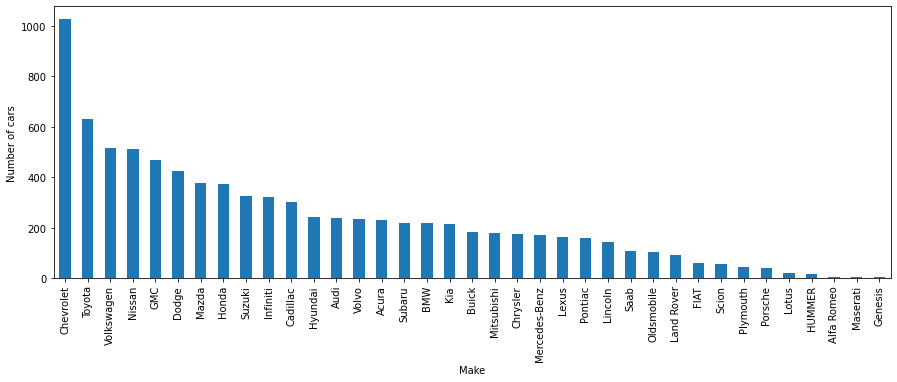

In [17]:
cars.Make.value_counts().plot(kind='bar', figsize=(15,5))
plt.ylabel('Number of cars')
plt.xlabel('Make')

Text(0.5, 0, 'Year')

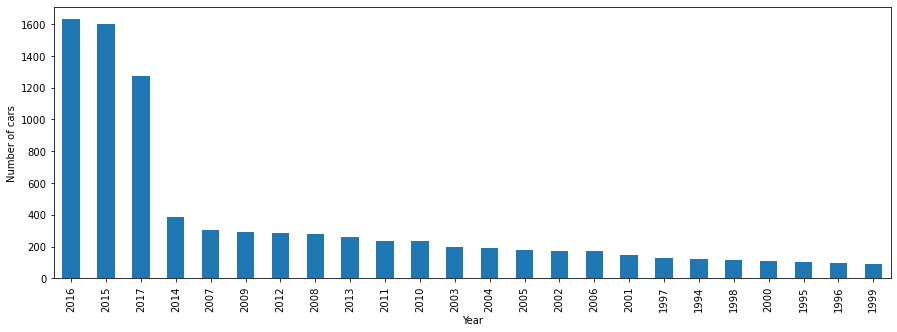

In [18]:
cars.Year.value_counts().plot(kind='bar', figsize=(15,5))
plt.ylabel('Number of cars')
plt.xlabel('Year')

Text(0.5, 0, 'Size of the care')

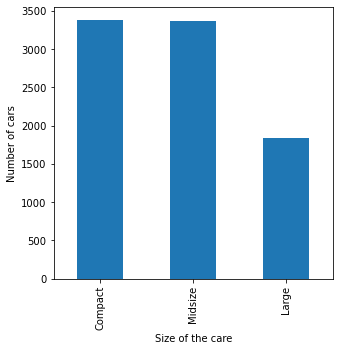

In [19]:
cars.Size.value_counts().plot(kind='bar', figsize=(5,5))
plt.ylabel('Number of cars')
plt.xlabel('Size of the care')

Text(0.5, 0, 'Fuel type')

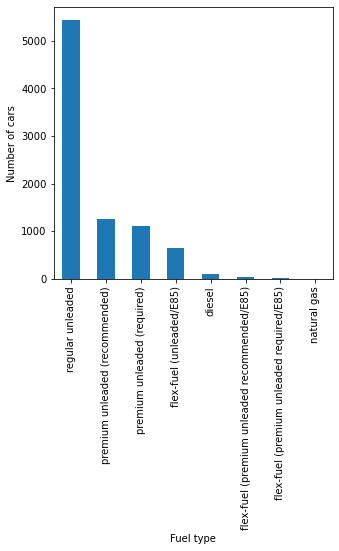

In [20]:
cars.Fuel.value_counts().plot(kind='bar', figsize=(5,5))
plt.ylabel('Number of cars')
plt.xlabel('Fuel type')

Text(0.5, 0, 'Number of doors')

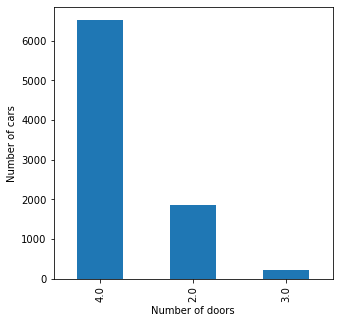

In [21]:
cars.Doors.value_counts().plot(kind='bar', figsize=(5,5))
plt.ylabel('Number of cars')
plt.xlabel('Number of doors')

<AxesSubplot:xlabel='MPG_H', ylabel='Fuel'>

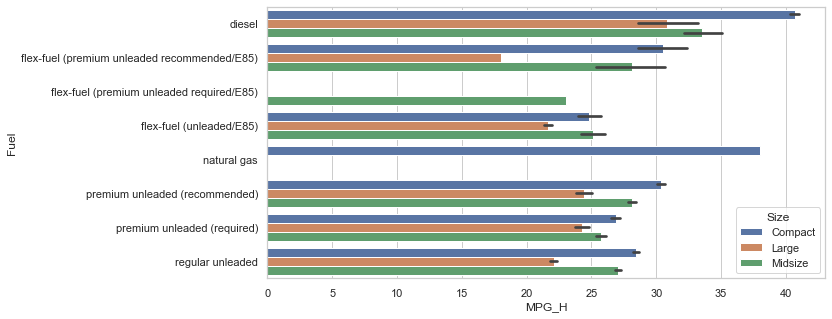

In [22]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_theme(style="whitegrid")
sns.barplot(x="MPG_H", y="Fuel",hue="Size", data=cars)

<AxesSubplot:xlabel='HP', ylabel='Fuel'>

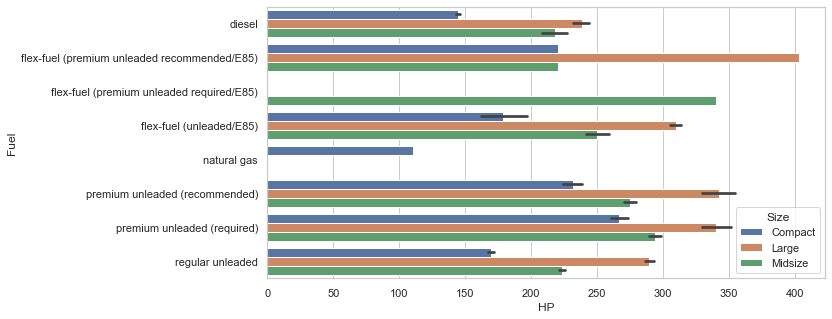

In [23]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_theme(style="whitegrid")
sns.barplot(x="HP", y="Fuel",hue="Size", data=cars)

<AxesSubplot:xlabel='Cylinders', ylabel='Fuel'>

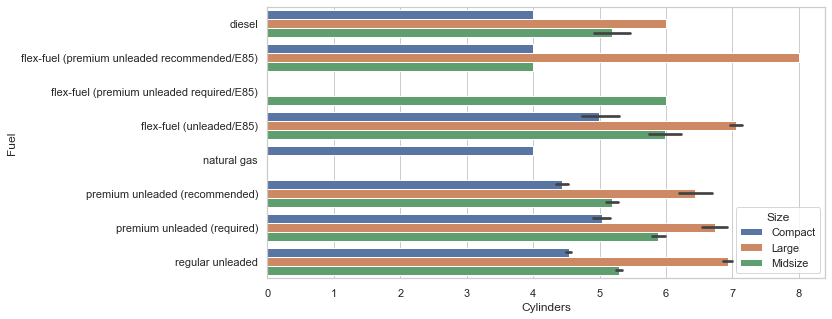

In [24]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_theme(style="whitegrid")
sns.barplot(x="Cylinders", y="Fuel",hue="Size", data=cars)

<AxesSubplot:xlabel='Popularity', ylabel='Style'>

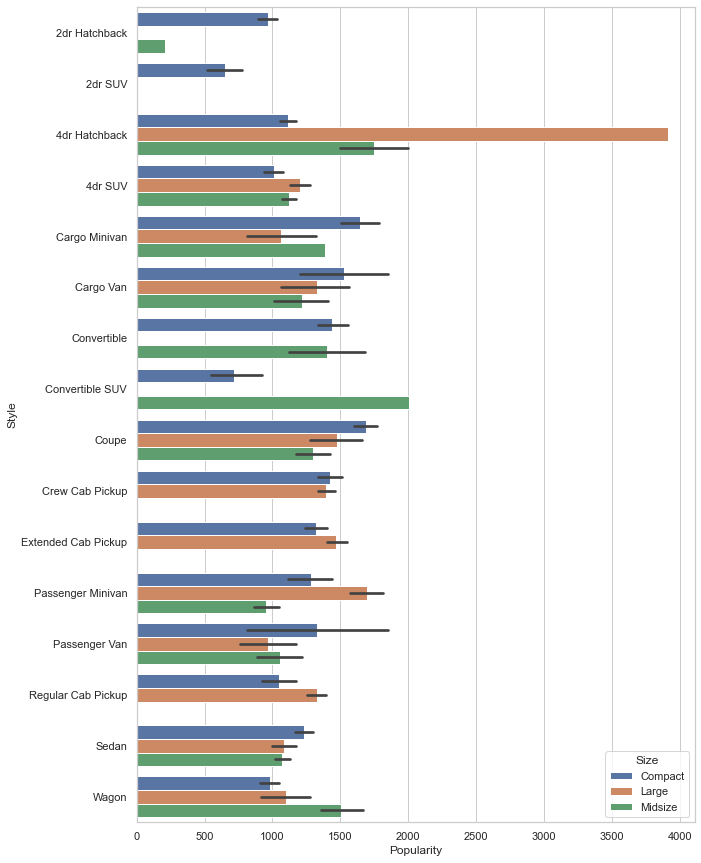

In [25]:
sns.set(rc={'figure.figsize':(10,15)})
sns.set_theme(style="whitegrid")
sns.barplot(x="Popularity", y="Style", hue="Size", data=cars)

<AxesSubplot:xlabel='Popularity', ylabel='Make'>

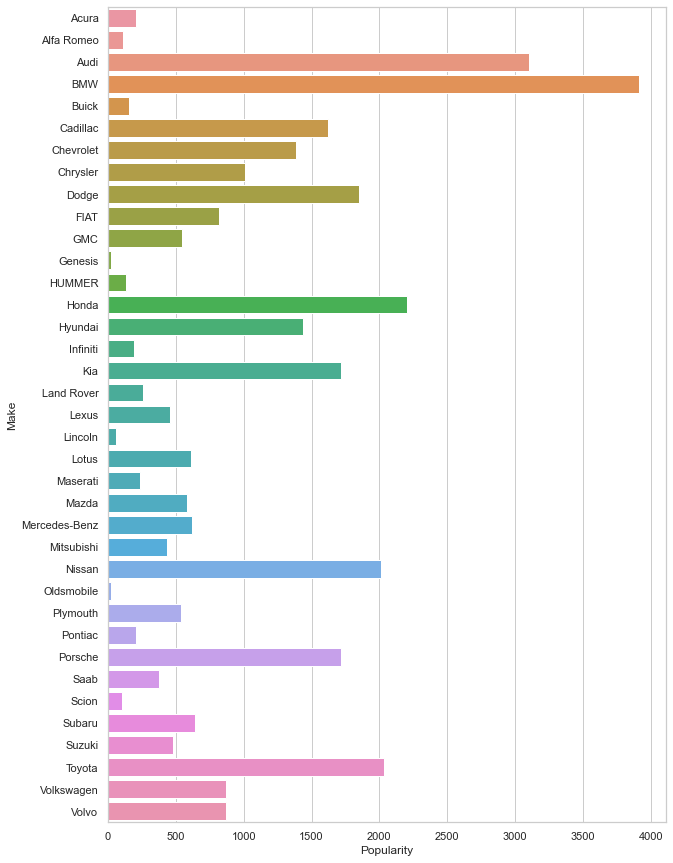

In [26]:
sns.set(rc={'figure.figsize':(10,15)})
sns.set_theme(style="whitegrid")
sns.barplot(x="Popularity", y="Make", data=cars)

<AxesSubplot:xlabel='HP', ylabel='Gear'>

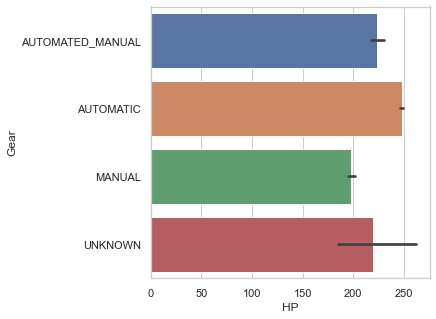

In [27]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set_theme(style="whitegrid")
sns.barplot(x="HP", y="Gear", data=cars)

<AxesSubplot:xlabel='Cylinders', ylabel='Gear'>

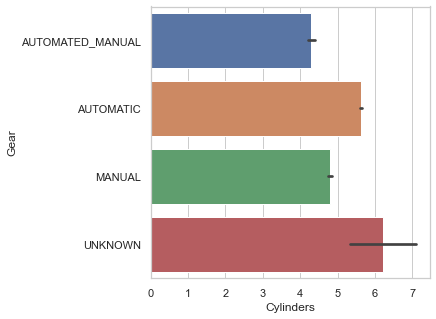

In [28]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set_theme(style="whitegrid")
sns.barplot(x="Cylinders", y="Gear", data=cars)

<AxesSubplot:xlabel='Price', ylabel='Gear'>

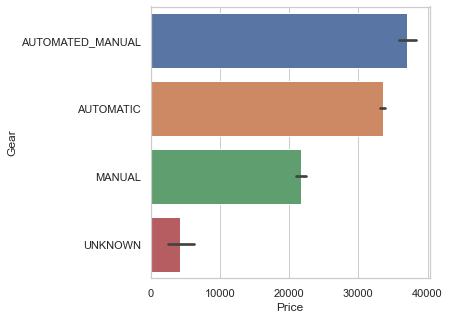

In [29]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set_theme(style="whitegrid")
sns.barplot(x="Price", y="Gear", data=cars)

<AxesSubplot:xlabel='Price', ylabel='Fuel'>

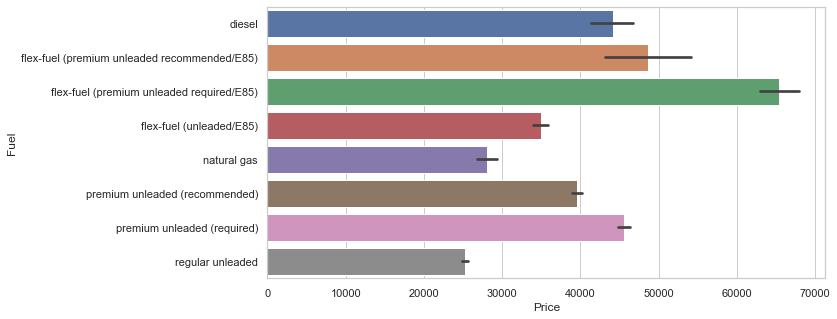

In [30]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_theme(style="whitegrid")
sns.barplot(x="Price", y="Fuel", data=cars)

<AxesSubplot:xlabel='Popularity', ylabel='Fuel'>

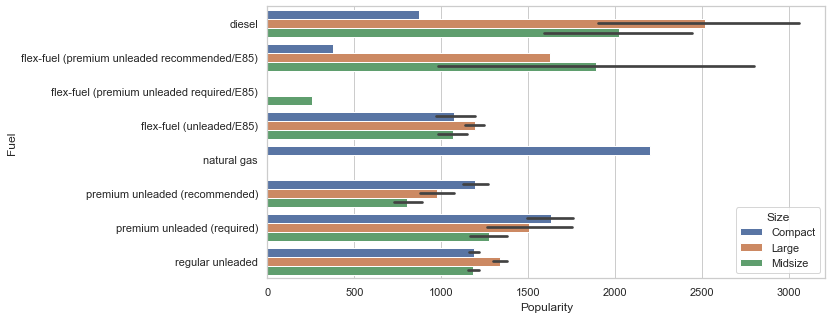

In [31]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_theme(style="whitegrid")
sns.barplot(x="Popularity", y="Fuel",hue="Size",data=cars)

,Year,HP,Cylinders,Doors,MPG_H,MPG_C,Popularity,Price
Year,1.000000,0.327839,-0.096321,0.239217,0.359335,0.324812,0.204521,0.589032
HP,0.327839,1.000000,0.741225,0.042637,-0.467069,-0.563853,0.106185,0.743199
Cylinders,-0.096321,0.741225,1.000000,0.023528,-0.698541,-0.750814,0.026035,0.392465
Doors,0.239217,0.042637,0.023528,1.000000,0.004142,0.021874,-0.074912,0.128622
MPG_H,0.359335,-0.467069,-0.698541,0.004142,1.000000,0.938217,0.080560,-0.129832
MPG_C,0.324812,-0.563853,-0.750814,0.021874,0.938217,1.000000,0.070613,-0.203133
Popularity,0.204521,0.106185,0.026035,-0.074912,0.080560,0.070613,1.000000,0.117520
Price,0.589032,0.743199,0.392465,0.128622,-0.129832,-0.203133,0.117520,1.000000


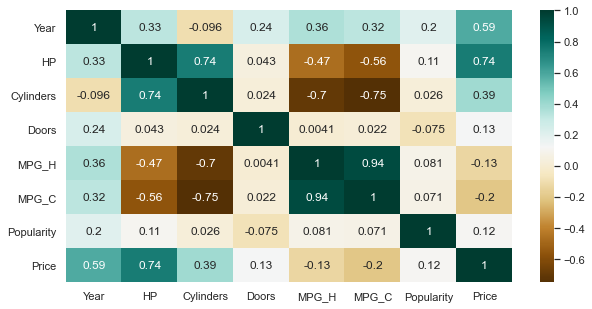

In [32]:
plt.figure(figsize=(10,5))
df= cars.corr()
sns.heatmap(df,cmap="BrBG",annot=True)
df

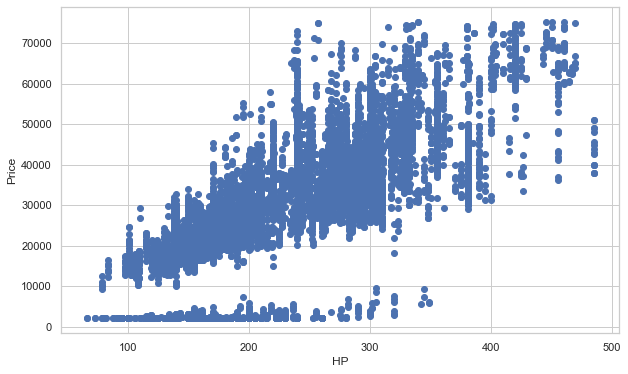

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(cars['HP'], cars['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()